## Import Libraries

In [17]:
import sklearn as sk
from sklearn import cluster
from sklearn import neighbors
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle

## Import Dataset

In [2]:
import pandas as pd
data = pd.read_csv("cobra-clean2009.csv")
#data['Beat'] = data['Beat'].fillna(0).astype('uint32')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289631 entries, 0 to 289630
Data columns (total 13 columns):
Occur Date          289631 non-null object
Occur Time          289631 non-null int64
Beat                289442 non-null float64
Location            289629 non-null object
UCR #               289631 non-null int64
UCR Literal         289631 non-null object
Neighborhood        289631 non-null object
NPU                 289614 non-null object
Longitude           289631 non-null float64
Latitude            289631 non-null float64
Shift Occurrence    289631 non-null object
Day of Week         289631 non-null int64
Crime Category      289631 non-null int64
dtypes: float64(3), int64(4), object(6)
memory usage: 28.7+ MB


In [4]:
data.head()

,Occur Date,Occur Time,Beat,Location,UCR #,UCR Literal,Neighborhood,NPU,Longitude,Latitude,Shift Occurrence,Day of Week,Crime Category
0,1/1/09,1145,408.0,2841 GREENBRIAR PKWY,630,LARCENY-NON VEHICLE,Greenbriar,R,-84.49328,33.68845,Day,3,4
1,1/1/09,1330,506.0,12 BROAD ST SW,630,LARCENY-NON VEHICLE,Downtown,M,-84.39201,33.75320,Day,3,4
2,1/1/09,1450,204.0,3393 PEACHTREE RD NE,630,LARCENY-NON VEHICLE,Lenox,B,-84.36212,33.84676,Day,3,4
3,1/1/09,1600,408.0,2841 GREENBRIAR PKWY SW,630,LARCENY-NON VEHICLE,Greenbriar,R,-84.49773,33.68677,Evening,3,4
4,1/1/09,1645,607.0,1217 CAROLINE ST NE,630,LARCENY-NON VEHICLE,Edgewood,O,-84.34875,33.75786,Evening,3,4


In [5]:
data['Neighborhood'].value_counts()

Downtown           23349
Midtown            16539
Old Fourth Ward     9187
West End            7988
Lenox               5743
                   ...  
Edmund Park            6
State Facility         5
Carroll Heights        4
Bankhead Courts        3
Englewood Manor        2
Name: Neighborhood, Length: 200, dtype: int64

In [6]:
data['UCR Literal'].value_counts()

LARCENY-FROM VEHICLE    88799
LARCENY-NON VEHICLE     70582
BURGLARY-RESIDENCE      41391
AUTO THEFT              39442
AGG ASSAULT             20520
ROBBERY-PEDESTRIAN      15025
BURGLARY-NONRES          9268
ROBBERY-COMMERCIAL       1997
ROBBERY-RESIDENCE        1816
HOMICIDE                  779
MANSLAUGHTER               12
Name: UCR Literal, dtype: int64

In [7]:
data['Shift Occurrence'].value_counts()

Evening    129793
Day        103819
Morning     56019
Name: Shift Occurrence, dtype: int64

In [8]:
data['NPU'].value_counts()

M    38746
E    28708
B    26140
V    16624
T    15965
Z    14269
R    13824
W    13268
X    12639
D    10999
F    10818
N    10803
J    10527
O    10295
I    10115
Y     9070
L     8902
S     7928
K     6869
G     6256
C     3358
A     2534
H      909
P       48
Name: NPU, dtype: int64

In [9]:
data['Beat'].value_counts()

204.0    7493
501.0    7317
303.0    6280
604.0    6082
508.0    5900
         ... 
412.0    1101
201.0     996
114.0     512
413.0     139
414.0      15
Name: Beat, Length: 78, dtype: int64

In [10]:
data.groupby('Neighborhood')['UCR Literal'].value_counts()

Neighborhood  UCR Literal         
Adair Park    LARCENY-FROM VEHICLE    387
              LARCENY-NON VEHICLE     350
              BURGLARY-RESIDENCE      329
              AUTO THEFT              317
              AGG ASSAULT             182
                                     ... 
Wyngate       BURGLARY-RESIDENCE       12
              AGG ASSAULT              10
              BURGLARY-NONRES           6
              AUTO THEFT                4
              ROBBERY-PEDESTRIAN        1
Name: UCR Literal, Length: 1732, dtype: int64

In [11]:
data_nbhood = data.pivot_table(index=['Neighborhood'], values= ['NPU'], columns=['UCR Literal'], aggfunc='size', fill_value=0)

In [12]:
data_nbhood[:50]

UCR Literal,AGG ASSAULT,AUTO THEFT,BURGLARY-NONRES,BURGLARY-RESIDENCE,HOMICIDE,LARCENY-FROM VEHICLE,LARCENY-NON VEHICLE,MANSLAUGHTER,ROBBERY-COMMERCIAL,ROBBERY-PEDESTRIAN,ROBBERY-RESIDENCE
Neighborhood,,,,,,,,,,,
Adair Park,182,317,68,329,11,387,350,0,18,167,13
Adams Park,105,193,105,272,3,325,289,0,23,87,15
Adamsville,37,72,23,37,1,146,58,0,0,32,1
Almond Park,115,149,18,246,11,85,114,0,4,50,16
Amal Heights,40,74,1,139,0,46,43,0,0,14,1
Ansley Park,12,86,6,69,0,431,75,0,0,26,1
Arden/Habersham,1,7,2,9,0,24,12,0,0,1,0
Ardmore,6,35,5,14,0,439,48,0,4,7,0
Argonne Forest,5,11,1,16,0,21,9,0,0,2,0


# Atlanta Crime - KMeans

## Description

In this part of the project, we will use K-Means clustering to calculate distance from each cluster for each data point. Then, we will use these distances as additional features for our supervised model.

## Date & Time Functions

In [13]:
def print_month(row):
    cur_date = row['Occur Date']
    year, month, day = (int(x) for x in cur_date.split('/'))    
    month = int(month)
    return month

def day_of_month(row):
    cur_date = row['Occur Date']
    year, month, day = (int(x) for x in cur_date.split('/'))    
    day = int(day)
    return day

def year(row):
    cur_date = row['Occur Date']
    year, month, day = (int(x) for x in cur_date.split('/'))    
    year = int(year)
    return year

## Load Data

## Data Manipulation

In [14]:
#Extract date features
data['Year'] = data.apply(lambda row: year(row), axis=1)
data['Month'] = data.apply(lambda row: print_month(row), axis=1)
data['Day of Month'] = data.apply(lambda row: day_of_month(row), axis=1)

#Drop unneeded features
data = data.drop(['Occur Date','Beat','Location','UCR #','Neighborhood','Shift Occurrence','UCR Literal','NPU'],axis=1)

X = data.to_numpy()
# Create categories to save for labeling after normalization 
X_cat = X[:,4]
#print(X_cat)

head_tail = data.iloc[np.r_[0:10, -10:0]]
head_tail

NameError: name 'np' is not defined

In [ ]:
print(X[:,4])

## Normalize Data

In [ ]:
X = sk.preprocessing.StandardScaler().fit_transform(X)

In [ ]:
X = sk.preprocessing.StandardScaler().fit_transform(X)
k = 5
km = sk.cluster.KMeans(n_clusters = k, init='random',n_init=1,max_iter=300,tol=1e-04,random_state=0)
km.fit_predict(X)
cent_dist = km.transform(X)
new_data = np.append(X, cent_dist, 1)
print(new_data)

In [ ]:
print(cent_dist)

## Compute KMeans

In [ ]:
print(X[0])
print()
print(X[:,0])

In [ ]:
# Before Normalization 

k_values = np.array([4])
for k in k_values:
    km = sk.cluster.KMeans(n_clusters = k, init='random',n_init=1,max_iter=300,tol=1e-04,random_state=0)
    y_km = km.fit_predict(X)

    centers = km.cluster_centers_
    labels = km.labels_
    inertia = km.inertia_
    print('Number of Clusters = ',k)
    print('--------------------------------------------------------------')
    print('Cluster Centers: ',centers)
    print('Labels: ',labels)
    print('Unique Labels: ',np.unique(labels))
    plt.scatter(X[:, 0], X[:, 1], c=y_km, s=50, cmap='jet')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=1);
    print('--------------------------------------------------------------')

Number of Clusters =  4
--------------------------------------------------------------
Cluster Centers:  [[2107.50258148  -84.39815838   33.7600017     3.00216269    3.38120836
     6.68706012   15.75162827   13.16212669]
 [1620.53528067  -84.39994468   33.76182889    2.97733976    3.49964363
     6.68606223   15.75348997   13.19261207]
 [1040.00654159  -84.40148615   33.75781725    2.80706692    3.45475922
     6.67997498   15.62606629   13.06411507]
 [ 222.14118645  -84.40079707   33.75463711    3.30677678    3.22623779
     6.6574971    15.68212866   13.12102583]]
Labels:  [2 2 1 ... 0 3 2]
Unique Labels:  [0 1 2 3]
--------------------------------------------------------------


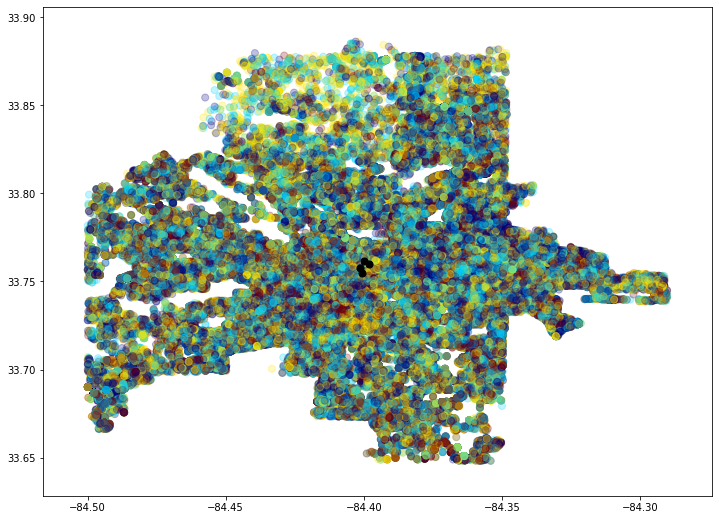

In [18]:
# After Normalization 

k_values = np.array([4])
for k in k_values:
    km = sk.cluster.KMeans(n_clusters = k, init='random',n_init=1,max_iter=300,tol=1e-04,random_state=0)
    y_km = km.fit_predict(X)

    centers = km.cluster_centers_
    labels = km.labels_
    inertia = km.inertia_
    print('Number of Clusters = ',k)
    print('--------------------------------------------------------------')
    print('Cluster Centers: ',centers)
    print('Labels: ',labels)
    print('Unique Labels: ',np.unique(labels))
    
    # Plot Sizing 
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 9
    plt.rcParams["figure.figsize"] = fig_size
    
    plt.scatter(X[:, 1], X[:, 2], c=y_km, s=50, cmap='jet', alpha=0.25)
    #plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50,c='lightgreen',edgecolor='black', label='cluster 1', alpha=0.25)
    
    plt.scatter(centers[:, 1], centers[:, 2], c='black', s=50, alpha=1);
    print('--------------------------------------------------------------')

In [19]:
print(X.shape)

(289631, 8)


## K Means Elbow Method

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = sk.cluster.KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## PCA >> KMeans

#### Redundant Things for Kernel Restart

In [20]:
import sklearn as sk
from sklearn import cluster
from sklearn import neighbors
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle

In [21]:
from sklearn.decomposition import PCA

In [22]:
def print_month(row):
    cur_date = row['Occur Date']
    year, month, day = (int(x) for x in cur_date.split('/'))    
    month = int(month)
    return month

def day_of_month(row):
    cur_date = row['Occur Date']
    year, month, day = (int(x) for x in cur_date.split('/'))    
    day = int(day)
    return day

def year(row):
    cur_date = row['Occur Date']
    year, month, day = (int(x) for x in cur_date.split('/'))    
    year = int(year)
    return year

#### Reading in Data

In [23]:
data = pd.read_csv("cobra-clean2019.csv") #, sep=',', header=0, engine='python', usecols = lambda column : column in ["Latitude", "Longitude"])

In [24]:
#Extract date features
data['Year'] = data.apply(lambda row: year(row), axis=1)
data['Month'] = data.apply(lambda row: print_month(row), axis=1)
data['Day of Month'] = data.apply(lambda row: day_of_month(row), axis=1)

#Drop unneeded features
data = data.drop(['Occur Date','Beat','Location','UCR #','Neighborhood','Shift Occurrence','UCR Literal','NPU'],axis=1)
#X = data.to_numpy()

# Create categories to save for labeling after normalization 
#X_cat = X[:,4]
X_cat = data['Crime Category']
#print(X_cat)

head_tail = data.iloc[np.r_[0:10, -10:0]]
head_tail

,Occur Time,Longitude,Latitude,Day of Week,Crime Category,Year,Month,Day of Month
0,20,-84.38964,33.75194,1,4,1,1,19
1,120,-84.39208,33.75312,1,4,1,1,19
2,1740,-84.49370,33.68077,1,4,1,1,19
3,400,-84.39615,33.75082,1,4,1,1,19
4,920,-84.41347,33.81022,1,4,1,1,19
5,137,-84.36481,33.82010,1,4,1,1,19
6,130,-84.36653,33.73867,1,4,1,1,19
7,1004,-84.41018,33.70080,1,4,1,1,19
8,100,-84.41222,33.72443,1,4,1,1,19
9,1100,-84.39345,33.73951,1,4,1,1,19


#### PCA

In [25]:
features = ['Occur Time', 'Longitude', 'Latitude', 'Day of Week', 'Year', 'Month']

x = data.loc[:, features].values
y = data.loc[:,['Crime Category']].values

x = sk.preprocessing.StandardScaler().fit_transform(x)

In [26]:
pca = PCA(n_components=2)

principalComp = pca.fit_transform(x)

principaldata = pd.DataFrame(data = principalComp, columns = ['principal component 1', 'principal component 2'])

In [27]:
finaldata = pd.concat([principaldata, data[['Crime Category']]], axis = 1)

In [28]:
print(pca.explained_variance_ratio_)

[0.21093874 0.1747215 ]


In [29]:
print(finaldata)

       principal component 1  principal component 2  Crime Category
0                   0.523404               0.097199               4
1                   0.495320               0.141140               4
2                   2.487338               1.302098               4
3                   0.454463               0.261852               4
4                  -0.419882               0.414177               4
...                      ...                    ...             ...
16276               0.542247              -0.548984               4
16277              -0.461042              -0.483433               4
16278               0.162256              -0.642725               4
16279               0.068956              -0.567807               4
16280               1.595930              -0.684026               4

[16281 rows x 3 columns]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

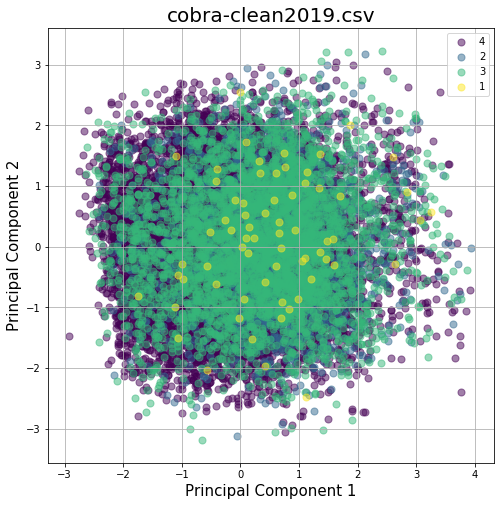

In [30]:
import random
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('cobra-clean2019.csv', fontsize = 20)
#targets = [4, 3, 2, 1]
targets = data['Crime Category'].unique()
colors = cm.get_cmap('viridis', len(targets))
#print(type)
#colors = []
#r = random.random
#for i in range(0,len(targets)):
#    rgb = (r(),r(),r())
#    colors.append(rgb)
#print(len(targets))
#print(colors.colors)
#colors = ['r', 'g', 'b']


for target, color in zip(targets,colors.colors):
    #print(color[:3])
    #print(len(color))
    indicesToKeep = finaldata['Crime Category'] == target
    ax.scatter(finaldata.loc[indicesToKeep, 'principal component 1']
               , finaldata.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50
               , alpha = 0.5)
    #print(indicesToKeep)
ax.legend(targets)
ax.grid()

[1, 2]


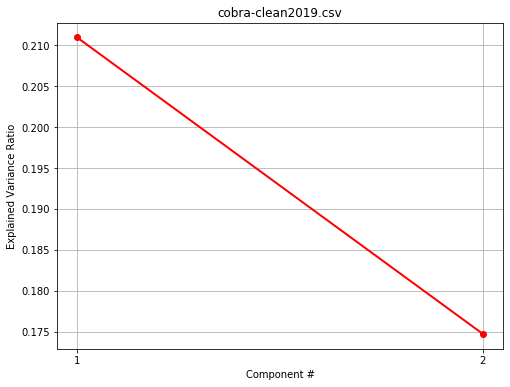

In [31]:
## PCA for cobra-clean2009.csv
# Features: Occur Time, UCR #, Longitude, Latitude, Day of Week
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

num_compo = [i+1 for i in range(len(pca.explained_variance_ratio_))]
print(num_compo)
plt.plot(num_compo, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title("cobra-clean2019.csv")
plt.xticks(num_compo)
plt.xlabel("Component #")
plt.ylabel("Explained Variance Ratio")
plt.grid()
plt.show()


In [32]:
import seaborn as sns

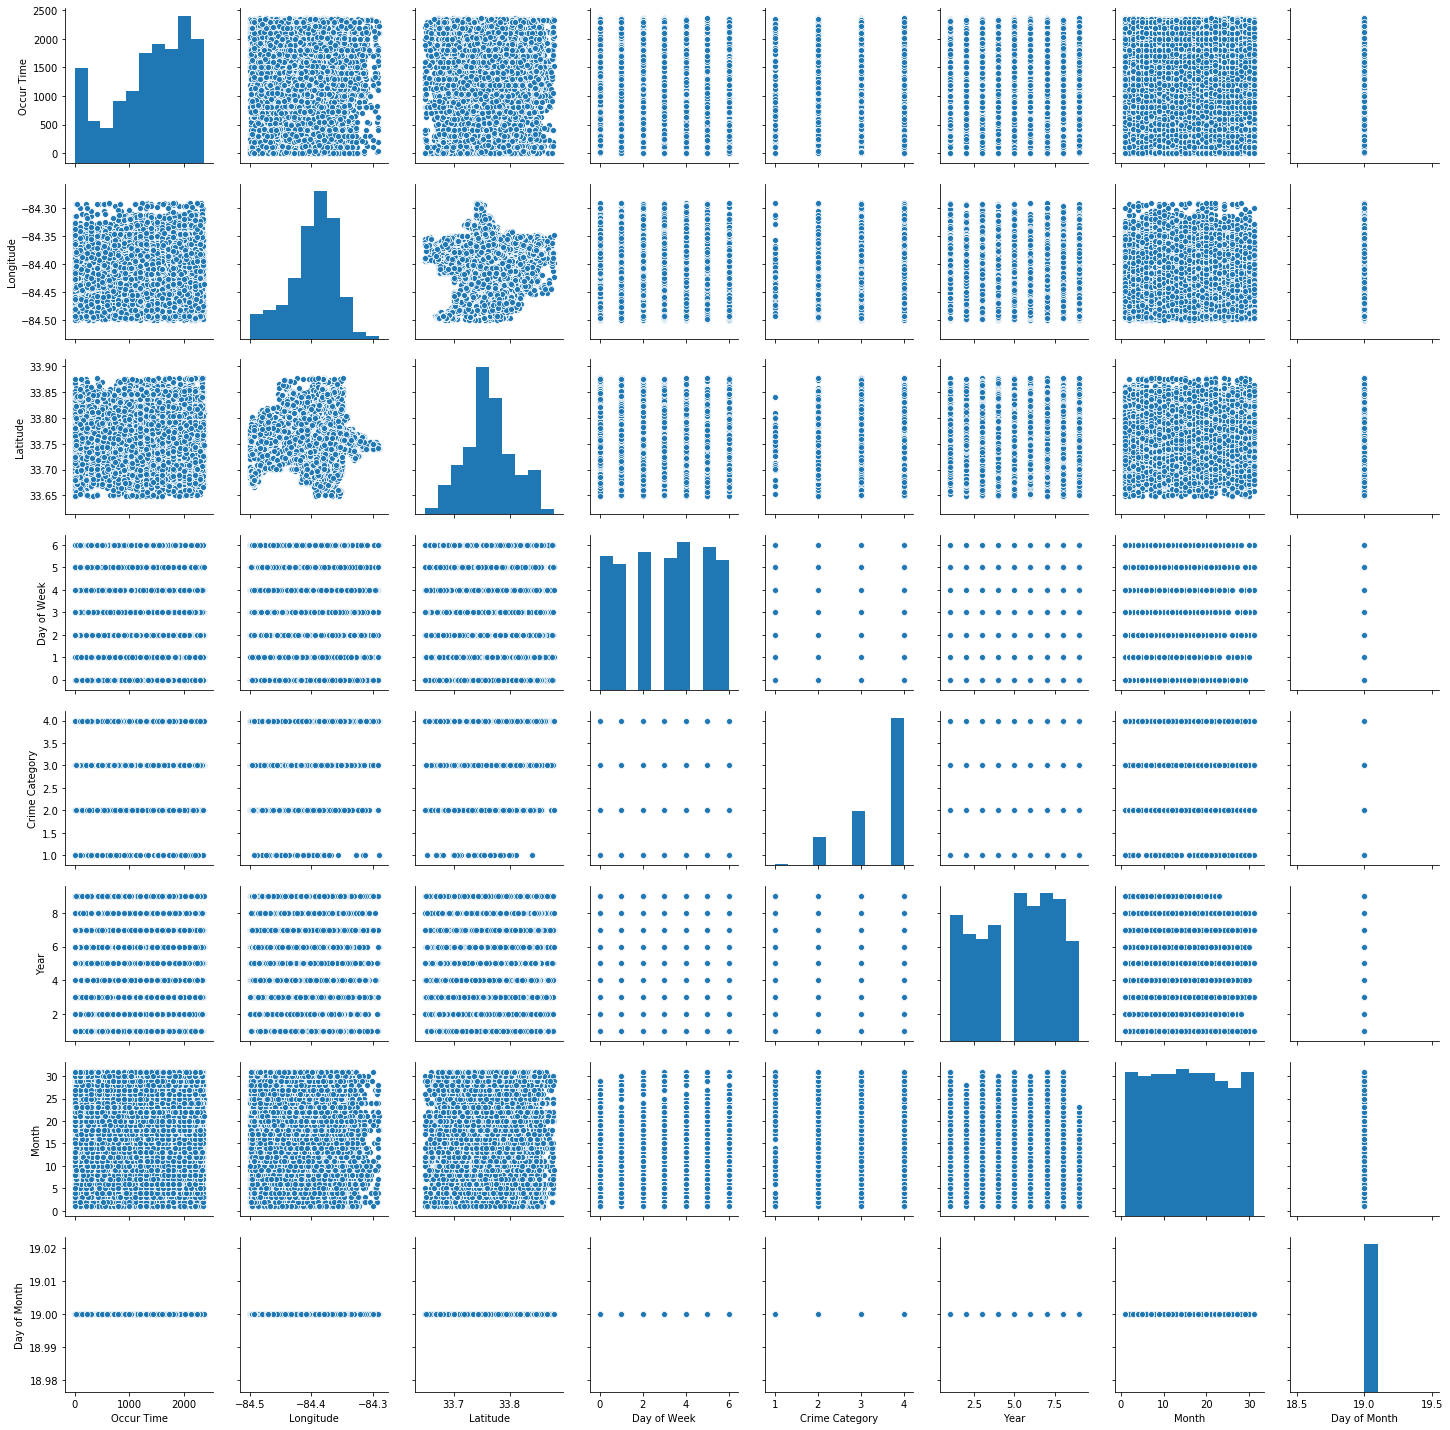

In [33]:
test_pair = sns.pairplot(data)

#### KMeans

In [34]:
print(centers)

[[2107.50258148  -84.39815838   33.7600017     3.00216269    3.38120836
     6.68706012   15.75162827   13.16212669]
 [1620.53528067  -84.39994468   33.76182889    2.97733976    3.49964363
     6.68606223   15.75348997   13.19261207]
 [1040.00654159  -84.40148615   33.75781725    2.80706692    3.45475922
     6.67997498   15.62606629   13.06411507]
 [ 222.14118645  -84.40079707   33.75463711    3.30677678    3.22623779
     6.6574971    15.68212866   13.12102583]]


In [35]:
print(principaldata['principal component 1'])

0        0.523404
1        0.495320
2        2.487338
3        0.454463
4       -0.419882
           ...   
16276    0.542247
16277   -0.461042
16278    0.162256
16279    0.068956
16280    1.595930
Name: principal component 1, Length: 16281, dtype: float64


Number of Clusters =  5
--------------------------------------------------------------
Cluster Centers:  [[ 0.68494888 -0.91428251]
 [-1.23500526  0.71630266]
 [-0.86190685 -0.86912852]
 [ 1.86007472  0.32050025]
 [ 0.27960344  0.91855668]]
Labels:  [4 4 3 ... 0 0 0]
Unique Labels:  [0 1 2 3 4]
Inertia :  10797.684815007173


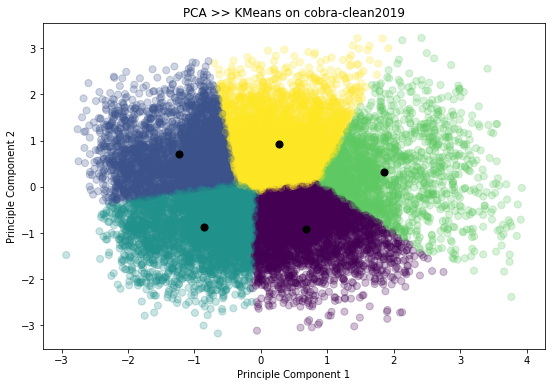

In [36]:
principaldata = principaldata.to_numpy()

km = sk.cluster.KMeans(n_clusters = 5, init='random',n_init=1,max_iter=300,tol=1e-04,random_state=0)
y_km = km.fit_predict(principaldata)

centers = km.cluster_centers_
labels = km.labels_
inertia = km.inertia_
print('Number of Clusters = ',5)
print('--------------------------------------------------------------')
print('Cluster Centers: ',centers)
print('Labels: ',labels)
print('Unique Labels: ',np.unique(labels))
print('Inertia : ',inertia)
# Plot Sizing 
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 9
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
    
plt.scatter(principaldata[:,0], principaldata[:,1], c=y_km, s=50, cmap='viridis', alpha=0.25)
#plt.scatter(principaldata[y_km == 0, 0],principaldata[y_km == 0, 1], s=50,c='lightgreen',edgecolor='black', label='cluster 1', alpha=0.25)
    
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=1)
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.title("PCA >> KMeans on cobra-clean2019");

In [37]:
print(np.unique(X_cat))

[1 2 3 4]


In [38]:
cmap = plt.cm.get_cmap('viridis')

print(cmap.colors)

[[0.267004, 0.004874, 0.329415], [0.26851, 0.009605, 0.335427], [0.269944, 0.014625, 0.341379], [0.271305, 0.019942, 0.347269], [0.272594, 0.025563, 0.353093], [0.273809, 0.031497, 0.358853], [0.274952, 0.037752, 0.364543], [0.276022, 0.044167, 0.370164], [0.277018, 0.050344, 0.375715], [0.277941, 0.056324, 0.381191], [0.278791, 0.062145, 0.386592], [0.279566, 0.067836, 0.391917], [0.280267, 0.073417, 0.397163], [0.280894, 0.078907, 0.402329], [0.281446, 0.08432, 0.407414], [0.281924, 0.089666, 0.412415], [0.282327, 0.094955, 0.417331], [0.282656, 0.100196, 0.42216], [0.28291, 0.105393, 0.426902], [0.283091, 0.110553, 0.431554], [0.283197, 0.11568, 0.436115], [0.283229, 0.120777, 0.440584], [0.283187, 0.125848, 0.44496], [0.283072, 0.130895, 0.449241], [0.282884, 0.13592, 0.453427], [0.282623, 0.140926, 0.457517], [0.28229, 0.145912, 0.46151], [0.281887, 0.150881, 0.465405], [0.281412, 0.155834, 0.469201], [0.280868, 0.160771, 0.472899], [0.280255, 0.165693, 0.476498], [0.279574, 0.170

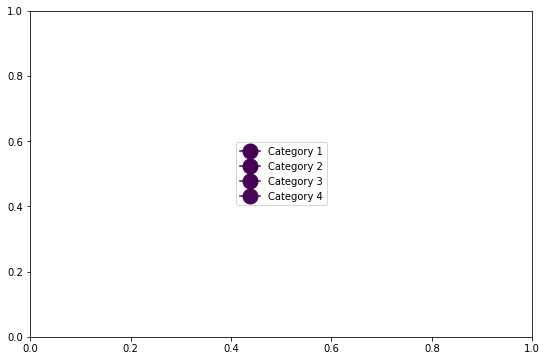

In [39]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

cmap = plt.cm.get_cmap('viridis')


legend_elements = [Line2D([0], [0], marker='o', color=cmap.colors[0], label='Category 1',
                          markerfacecolor=cmap.colors[0], markersize=15),
                   Line2D([0], [0], marker='o', color=cmap.colors[1], label='Category 2',
                          markerfacecolor=cmap.colors[1], markersize=15),
                   Line2D([0], [0], marker='o', color=cmap.colors[2], label='Category 3',
                          markerfacecolor=cmap.colors[2], markersize=15),
                   Line2D([0], [0], marker='o', color=cmap.colors[3], label='Category 4',
                          markerfacecolor=cmap.colors[3], markersize=15)]

# Create the figure
fig, ax = plt.subplots()
ax.legend(handles=legend_elements, loc='center')

plt.show()

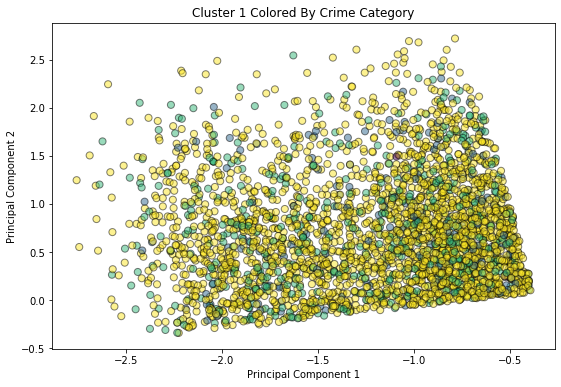

In [40]:
#size = plt.figure(fixsize=(6,8))
#s1 = size.add_subplot(111)
plt.title("Cluster 1 Colored By Crime Category")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

#colors = ['r','y','b','g']
#for i in range(4):
#    plt.scatter(principaldata[y_km == 1, 0], principaldata[y_km == 1, 1], s=50,c=X_cat[y_km == 1],c=colors[i],edgecolor='black', label='Category '+str(i+1), alpha=0.25)

plt.scatter(principaldata[y_km == 1, 0], principaldata[y_km == 1, 1], s=50,c=X_cat[y_km == 1],cmap='viridis',edgecolor='black', label='cluster 1', alpha=0.5)


#### Elbow

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = sk.cluster.KMeans(n_clusters=k)
    km = km.fit(principaldata)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

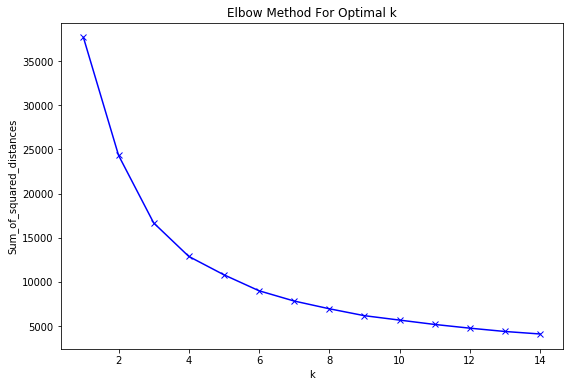

In [41]:

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = sk.cluster.KMeans(n_clusters=k)
    km = km.fit(principaldata)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# APPLYING UNSUPERVISED ALGORITHMS

In [42]:
import sklearn as sk
from sklearn import cluster
from sklearn import neighbors
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle

In [43]:
# Packages for geospatial analysis
# Link: https://geoffboeing.com/2014/08/clustering-to-reduce-spatial-data-set-size/
from geopy.distance import great_circle
from shapely.geometry import MultiPoint

ModuleNotFoundError: No module named 'shapely'

## Description

Tried unsupervised learning algorithms, namely, DBSCAN, K-Means, and Mean Shift clustering algorithms to analyze the Atlanta Crime dataset. Clustering based on both location and time will provide us more insights about the dataset that will be useful in understanding the data prior to building our predictive models with supervised learning algorithms

In [ ]:
# 2019
data = pd.read_csv("cobra-clean2009.csv", sep=',', header=0, engine='python', usecols = lambda column : column in ["Latitude", "Longitude"])
# Cleaned 2009-2018
#data = pd.read_csv("cobra-clean.csv", sep=',', header=0, engine='python', usecols = lambda column : column in ["Latitude", "Longitude"])
X = data.to_numpy()
head_tail = data.iloc[np.r_[0:10, -10:0]]
head_tail

In [ ]:
data = pd.read_csv("cobra-clean2019.csv")

plt.figure(figsize=(4.5, 3))
objects = ('Category 1', 'Category 2', 'Category 3', 'Category 4')
y_pos = np.arange(len(objects))
cat1 = len(data[(data['Crime Category']==1)])
cat2 = len(data[(data['Crime Category']==2)])
cat3 = len(data[(data['Crime Category']==3)])
cat4 = len(data[(data['Crime Category']==4)])
performance = np.array([cat1,cat2,cat3,cat4])
total = cat1 + cat2 + cat3 + cat4
percents = np.round((performance/total)*100,1)

def autolabel(rects):
    for idx,rect in enumerate(percent_bar):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 0.5*height,
                percents[idx],
                ha='center', va='bottom', rotation=0)

percent_bar = plt.bar(y_pos, percents, align='center', color=['red', 'green', 'blue', 'cyan'])
#alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Percent Composition')
plt.title('Category Percent Composition (2019)')

autolabel(percent_bar)

plt.savefig('percentcomp2019_histogram.png')
plt.show()

In [ ]:
data2 = pd.read_csv("cobra-counts2019.csv")
data2['Crime Score']  = (1000 * data2['Category 1']) + (100 * data2['Category 2']) + (10 * data2['Category 3']) + (1 * data2['Category 4'])

n_list = data2.Neighborhood.unique()
y_pos = np.arange(len(n_list))
avg = np.arange(len(n_list))
for i in range(len(n_list)):
    avg[i] = data2[data2['Neighborhood']==n_list[i]]['Crime Score'].sum(axis=0)
p=np.vstack([n_list,avg]).T
avg_data = pd.DataFrame(data=p,columns=['Neighborhood', 'Average Crime Score'])
avg_data =avg_data.sort_values(by=['Average Crime Score'])

pd.set_option('display.max_rows', len(avg_data))
print(avg_data)
pd.reset_option('display.max_rows')

display(avg_data)
plt.rcParams.update({'font.size': 60})
plt.figure(figsize=(40, 20))
y_pos2 = [2*i for i in y_pos]
Avg_bar = plt.bar(y_pos, avg_data['Average Crime Score'], width=1,align='center', color=['red', 'green', 'blue', 'cyan'])
#alpha=0.5)
#plt.xticks(y_pos2, y_pos, rotation = 'vertical')
plt.xlabel('Neighborhood Index')
plt.ylabel('Crime Score Sum')
plt.title('Atlanta Crime Scores by Neighborhood (2019)')

plt.savefig('crimescore2019_histogram.png')
plt.show()
plt.rcParams.update(plt.rcParamsDefault)

In [ ]:
# Geo spatial
#df = pd.read_csv('COBRA-2019.csv')
coords = data.as_matrix(columns=['Latitude', 'Longitude'])

# Mean Shift Algorithm

In [ ]:
#Parameter
bandwidth = sk.cluster.estimate_bandwidth(X, quantile=0.05, n_samples=1000)

ms = sk.cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters = len(labels_unique)
print('Bandwidth =',bandwidth)
print('Labels: ',labels)
print('Unique Labels: ',np.unique(labels))
print('Cluster Centers: ',cluster_centers)
print("number of estimated clusters : %d" % n_clusters)

# Plot result
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters)
plt.show()

# Compute KMeans

In [ ]:
k_values = np.array([3,10])
for k in k_values:
    km = sk.cluster.KMeans(n_clusters = k, init='random',n_init=1,max_iter=300,tol=1e-04,random_state=0)
    y_km = km.fit_predict(X)

    centers = km.cluster_centers_
    labels = km.labels_
    inertia = km.inertia_
    print('Number of Clusters = ',k)
    print('--------------------------------------------------------------')
    print('Cluster Centers: ',centers)
    print('Labels: ',labels)
    print('Unique Labels: ',np.unique(labels))
    plt.scatter(X[:, 0], X[:, 1], c=y_km, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=1);
    print('--------------------------------------------------------------')

In [ ]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = sk.cluster.KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Unsupervised Learning

In [ ]:
import pandas as pd

# from sklearn.tree import plot_tree
# from sklearn.tree.export import export_text
# from sklearn.model_selection import train_test_split # Import train_test_split function

# Preprocessing, Metrics
from sklearn import preprocessing
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Classifiers, Regressions for DT, RF, NB, SV, LogReg, LinReg
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import BayesianRidge

# from sklearn.svm import SVC
# from sklearn.svm import SVR

# from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LinearRegression

from sklearn.cluster import KMeans

# Other imports
import datetime
import random
import numpy as np
import time
import matplotlib.pyplot as plt

In [ ]:
training_categories = pd.read_csv("cobra-clean2009.csv", sep=',', header=0, usecols = lambda column : column in ["Occur Date", "Shift Occurrence", "Neighborhood", "Day of Week", "Crime Category"])
# training_categories.head()

training_crime_scores = pd.read_csv("bigdaddy.csv", usecols = lambda column : column not in ["Date", "Year", "Day of Month"])
# training_crime_scores.head()

In [ ]:
test_categories = pd.read_csv("cobra-clean2019.csv", sep=',', header=0, usecols = lambda column : column in ["Occur Date", "Shift Occurrence", "Neighborhood", "Day of Week", "Crime Category"])
# test_categories.head()

test_crime_scores = pd.read_csv("cobra-counts2019.csv", usecols = lambda column : column not in ["Date", "Year", "Day of Month"])
# test_crime_scores.head()

In [ ]:
training_categories['Month'] = training_categories["Occur Date"].str.split("/", n = 1, expand = True)[0]
training_categories = training_categories.drop(["Occur Date"], 1)

le = preprocessing.LabelEncoder()
le.fit(training_categories["Neighborhood"])
training_categories["Neighborhood"] = le.transform(training_categories["Neighborhood"])
le.fit(training_categories["Shift Occurrence"])
training_categories["Shift Occurrence"] = le.transform(training_categories["Shift Occurrence"])

training_categories = training_categories.sample(frac=1)

# training_categories.head()


training_crime_scores['Crime Score'] = 1000 * training_crime_scores['Category 1'] + 100 * training_crime_scores['Category 2'] + 10 * training_crime_scores['Category 3'] + 1 * training_crime_scores['Category 4']
training_crime_scores = training_crime_scores.drop(["Category 1", "Category 2", "Category 3", "Category 4"], 1)

le = preprocessing.LabelEncoder()
le.fit(training_crime_scores["Neighborhood"])
training_crime_scores["Neighborhood"] = le.transform(training_crime_scores["Neighborhood"])
# le.fit(training_crime_scores["Shift"])
# training_crime_scores["Shift"] = le.transform(training_crime_scores["Shift"])

training_crime_scores = training_crime_scores.sample(frac=1)

# training_crime_scores.head()

In [ ]:
test_categories['Month'] = test_categories["Occur Date"].str.split("/", n = 1, expand = True)[0]
test_categories = test_categories.drop(["Occur Date"], 1)

le = preprocessing.LabelEncoder()
le.fit(test_categories["Neighborhood"])
test_categories["Neighborhood"] = le.transform(test_categories["Neighborhood"])
le.fit(test_categories["Shift Occurrence"])
test_categories["Shift Occurrence"] = le.transform(test_categories["Shift Occurrence"])

# test_categories.head()


test_crime_scores['Crime Score'] = 1000 * test_crime_scores['Category 1'] + 100 * test_crime_scores['Category 2'] + 10 * test_crime_scores['Category 3'] + 1 * test_crime_scores['Category 4']
test_crime_scores = test_crime_scores.drop(["Category 1", "Category 2", "Category 3", "Category 4"], 1)

le = preprocessing.LabelEncoder()
le.fit(test_crime_scores["Neighborhood"])
test_crime_scores["Neighborhood"] = le.transform(test_crime_scores["Neighborhood"])
# le.fit(test_crime_scores["Shift"])
# test_crime_scores["Shift"] = le.transform(test_crime_scores["Shift"])

# test_crime_scores.head()

In [ ]:
print(training_categories.head())
print(test_categories.head())
print(len(training_categories))
print(training_crime_scores.head())
print(test_crime_scores.head())

In [ ]:
## Compute KMeans clusters and distance for each point to centroids
# Add data_variable
X = preprocessing.StandardScaler().fit_transform(training_categories[["Day of Week", "Shift Occurrence", "Month"]])
km = KMeans(n_clusters=5, init='random', n_init=1, max_iter=300, tol=1e-04, random_state=0)
km.fit_predict(X)
cent_dist = km.transform(X)
cent_dist_df = pd.DataFrame(cent_dist)
cent_dist_df.columns = ["Feat0", "Feat1", "Feat2", "Feat3", "Feat4"]

training_cat_trans = pd.concat([pd.DataFrame(training_categories), cent_dist_df], axis=1)
# training_cat_trans.head()

In [ ]:
## Compute KMeans clusters and distance for each point to centroids
# Add data_variable
# Neighborhood  Month  Day of Week  Crime Score
X = preprocessing.StandardScaler().fit_transform(training_crime_scores[["Day of Week", "Month"]])
km = KMeans(n_clusters=5, init='random', n_init=1, max_iter=300, tol=1e-04, random_state=0)
km.fit_predict(X)
cent_dist = km.transform(X)
cent_dist_df = pd.DataFrame(cent_dist)
cent_dist_df.columns = ["Feat0", "Feat1", "Feat2", "Feat3", "Feat4"]

training_cs_trans = pd.concat([pd.DataFrame(training_crime_scores), cent_dist_df], axis=1)
# training_cs_trans.head()

In [ ]:
## Compute KMeans clusters and distance for each point to centroids
# Add data_variable
X = preprocessing.StandardScaler().fit_transform(test_categories[["Day of Week", "Shift Occurrence", "Month"]])
km = KMeans(n_clusters=5, init='random', n_init=1, max_iter=300, tol=1e-04, random_state=0)
km.fit_predict(X)
cent_dist = km.transform(X)
cent_dist_df = pd.DataFrame(cent_dist)
cent_dist_df.columns = ["Feat0", "Feat1", "Feat2", "Feat3", "Feat4"]

test_cat_trans = pd.concat([pd.DataFrame(test_categories), cent_dist_df], axis=1)
# test_cat_trans.head()

In [ ]:
## Compute KMeans clusters and distance for each point to centroids
# Add data_variable
# Neighborhood  Month  Day of Week  Crime Score
X = preprocessing.StandardScaler().fit_transform(test_crime_scores[["Day of Week", "Month"]])
km = KMeans(n_clusters=5, init='random', n_init=1, max_iter=300, tol=1e-04, random_state=0)
km.fit_predict(X)
cent_dist = km.transform(X)
cent_dist_df = pd.DataFrame(cent_dist)
cent_dist_df.columns = ["Feat0", "Feat1", "Feat2", "Feat3", "Feat4"]

test_cs_trans = pd.concat([pd.DataFrame(test_crime_scores), cent_dist_df], axis=1)
# test_cs_trans.head()

# Plots and Metrics

### Splitting data into training and test features and labels: X is features, y is label

In [ ]:
# Reading data & split into training and testing sets

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100)
# Geeksforgeeks: "random_state" variable is a pseudo-random number generator state used for random sampling

X_train_class = training_categories.drop(['Crime Category'], 1)
y_train_class = training_categories['Crime Category']
X_test_class = test_categories.drop(['Crime Category'], 1)
y_test_class = test_categories['Crime Category']

X_train_reg = training_crime_scores.drop(['Crime Score'], 1)
y_train_reg = training_crime_scores['Crime Score']
X_test_reg = test_crime_scores.drop(['Crime Score'], 1)
y_test_reg = test_crime_scores['Crime Score']

In [ ]:
X_train_class_trans = training_cat_trans.drop(['Crime Category'], 1)
y_train_class_trans = training_cat_trans['Crime Category']
X_test_class_trans = test_cat_trans.drop(['Crime Category'], 1)
y_test_class_trans = test_cat_trans['Crime Category']

X_train_reg_trans = training_cs_trans.drop(['Crime Score'], 1)
y_train_reg_trans = training_cs_trans['Crime Score']
X_test_reg_trans = test_cs_trans.drop(['Crime Score'], 1)
y_test_reg_trans = test_cs_trans['Crime Score']

In [ ]:
def model_fitting(X_train, y_train, X_test, model, classOrReg):
    start_time = time.time()
    # Model Definition & Fitting
    if model == "dt":
        if classOrReg == "class":
            fitter = DecisionTreeClassifier()
        else:
            fitter = DecisionTreeRegressor()
    elif model == "rf":
        if classOrReg == "class":
            fitter = RandomForestClassifier(n_estimators=25)
        else:
            fitter = RandomForestRegressor(n_estimators=25)
    elif model == "nb":
        if classOrReg == "class":
            fitter = GaussianNB()
        else:
            fitter = BayesianRidge()
#     elif model == "sv":
#         if classOrReg == "class":
#             fitter = SVC(gamma='scale')
#         else:
#             fitter = SVR()
#     elif model == "logreg":
#         fitter = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=10000)
    elif model == "linreg":
        fitter = LinearRegression()
    else:
        print("Unrecognized model", model)
        return
    fitter = fitter.fit(X_train, y_train)
    end_time = time.time()
    # Predict based on the given features for the test set
    y_pred = fitter.predict(X_test)
    return (fitter, y_pred, end_time - start_time)

## Cross Validation of Methods

In [ ]:
def apr(y_test, y_pred):
    acc_score = metrics.accuracy_score(y_test, y_pred)
    prec_cats_score = metrics.precision_score(y_test, y_pred, average=None)
    recall_cats_score = metrics.recall_score(y_test, y_pred, average=None)
    return acc_score, prec_cats_score, recall_cats_score

In [ ]:
def rmse(pred, label):
    return np.sqrt(np.sum(np.square(np.subtract(pred, label))) / len(pred))

In [ ]:
def cross_validation(X, y, kfold, model, classOrReg):
    totalTime = 0
    totalAPR = np.array([0, [0, 0, 0, 0], [0, 0, 0, 0]])
    totalRMSE = 0
    for i in range(kfold):
        ind1 = int(i * len(X) / kfold)
        ind2 = int((i + 1) * len(X) / kfold)
        if ind1 == 0:
            trainX = X[ind2:]
            trainY = y[ind2:]
        elif ind2 == len(X):
            trainX = X[:ind1]
            trainY = y[:ind1]
        else:
            trainX = np.concatenate((X[:ind1], X[ind2:]))
            trainY = np.concatenate((y[:ind1], y[ind2:]))
        testX = X[ind1:ind2]
        testY = y[ind1:ind2]
        
        fitter, y_predictor, elapsed_time = model_fitting(trainX, trainY, testX, model, classOrReg)
        totalTime += elapsed_time
        if classOrReg == "class":
            if model == "linreg":
                totalAPR += apr(np.around(y_predictor), testY)
            else:
                totalAPR += apr(y_predictor, testY)
        else:
            totalRMSE += rmse(y_predictor, testY)
    if classOrReg == "class":
        return totalTime / kfold, totalAPR / kfold
    else:
        return totalTime / kfold, totalRMSE / kfold
    raise NotImplementedError

In [ ]:
cv_times_class = []
cv_times_reg = []
APR_array = []
RMSE_array = []
for model in ["dt", "rf", "nb", "linreg"]:
    for classOrReg in ["class", "reg"]:
        if classOrReg == "class":
            avg_time, avg_APR = cross_validation(X_train_class, y_train_class, 5, model, classOrReg)
            cv_times_class.append(avg_time)
            APR_array.append(avg_APR)
        else:
            avg_time, avg_RMSE = cross_validation(X_train_reg, y_train_reg, 5, model, classOrReg)
            cv_times_reg.append(avg_time)
            RMSE_array.append(avg_RMSE)

In [ ]:
cv_times_class_trans = []
cv_times_reg_trans = []
APR_array_trans = []
RMSE_array_trans = []
for model in ["dt", "rf", "nb", "linreg"]:
    for classOrReg in ["class", "reg"]:
        if classOrReg == "class":
            avg_time, avg_APR = cross_validation(X_train_class_trans, y_train_class_trans, 5, model, classOrReg)
            cv_times_class_trans.append(avg_time)
            APR_array_trans.append(avg_APR)
        else:
            avg_time, avg_RMSE = cross_validation(X_train_reg_trans, y_train_reg_trans, 5, model, classOrReg)
            cv_times_reg_trans.append(avg_time)
            RMSE_array_trans.append(avg_RMSE)

In [ ]:
# plt.figure(figsize=(12, 6))
# plt.bar([i - 0.125 for i in range(len(cv_times_class))], cv_times_class, width=0.25, color="gold")
# for i in range(len(cv_times_class)):
#     plt.text(i - 0.125, cv_times_class[i], round(cv_times_class[i], 2), va='bottom', ha='center')
# plt.bar([i + 0.125 for i in range(len(cv_times_reg))], cv_times_reg, width=0.25, color="red")
# for i in range(len(cv_times_reg)):
#     plt.text(i + 0.125, cv_times_reg[i], round(cv_times_reg[i], 2), va='bottom', ha='center')


# plt.xticks([i for i in range(len(cv_times_class))], ["DT", "RF", "NBC", "LinReg"])
# plt.legend(["Categories (Classifier)", "Crime Scores (Regressor)"])
# plt.xlabel("Supervised Method")
# plt.ylabel("Time (seconds)")
# plt.title("Average Cross Validation Runtimes of Classification or Regression Methods")

# plt.savefig('images/Supervised_Algs/cv_elapsed_times.png')
# plt.show()

times_colors = ["gold", "red", "blue", "green"]

plt.figure(figsize=(12, 6))

plt.bar([i * 2 - 0.375 for i in range(len(cv_times_class))], cv_times_class, width=0.25, color="gold")
plt.bar([i * 2 - 0.125 for i in range(len(cv_times_reg))], cv_times_reg, width=0.25, color="red")
plt.bar([i * 2 + 0.125 for i in range(len(cv_times_class_trans))], cv_times_class_trans, width=0.25, color="blue")
plt.bar([i * 2 + 0.375 for i in range(len(cv_times_reg_trans))], cv_times_reg_trans, width=0.25, color="green")
for i in range(len(cv_times_class)):
    plt.text(i * 2 - 0.375, cv_times_class[i], round(cv_times_class[i], 2), va='bottom', ha='center')
    plt.text(i * 2 - 0.125, cv_times_reg[i], round(cv_times_reg[i], 2), va='bottom', ha='center')
    plt.text(i * 2 + 0.125, cv_times_class_trans[i], round(cv_times_class_trans[i], 2), va='bottom', ha='center')
    plt.text(i * 2 + 0.375, cv_times_reg_trans[i], round(cv_times_reg_trans[i], 2), va='bottom', ha='center')

plt.xticks([i * 2 for i in range(len(cv_times_class))], ["DT", "RF", "NB", "LinReg"])
plt.legend(["Categories (Classifier)", "Crime Scores (Regressor)", "Added Features Categories (Classifier)", "Added Features Crime Scores (Regressor)"])
plt.xlabel("Supervised Method")
plt.ylabel("Time (seconds)")
plt.title("Average Cross Validation Runtimes across the Supervised Methods (kfold=5)")

plt.savefig('mug_cv_elapsed_times.png')
plt.show()

In [ ]:
f, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(18,18))

# y_preds = [dt_class_y_pred, rf_class_y_pred, nb_class_y_pred, linreg_class_y_pred]
# y_preds_trans = [dt_class_y_pred_trans, rf_class_y_pred_trans, nb_class_y_pred_trans, linreg_class_y_pred_trans]
y_preds_colors = ["red", "green", "lightblue", "gold"]

for i, acc_prec_rec in enumerate(APR_array):
    # acc_prec_rec = apr(y_test_class, y_pred)
    # acc_prec_rec_trans = apr(y_test_class_trans, y_preds_trans[i])
    acc_prec_rec_trans = APR_array_trans[i]

    ax0.bar(i * 2, acc_prec_rec[0], width=0.5, color=y_preds_colors[0])
    ax0.bar(i * 2 + 0.5, acc_prec_rec_trans[0], width=0.5, color=y_preds_colors[1])

    ax0.text(i * 2, acc_prec_rec[0], round(acc_prec_rec[0], 3), va='bottom', ha='center')
    ax0.text(i * 2 + 0.5, acc_prec_rec_trans[0], round(acc_prec_rec_trans[0], 3), va='bottom', ha='center')

    for j in range(len(acc_prec_rec[1])):
        locs1 = [2.5 * i * 2 - 0.75 + 0.5 * j, 2.5 * i * 2 - 0.75 + 0.5 * j + 2]
        ax1.bar(locs1, [acc_prec_rec[1][j], acc_prec_rec_trans[1][j]], width=0.5, color=y_preds_colors[j])
        ax1.text(2.5 * i * 2 - 0.75 + 0.5 * j, acc_prec_rec[1][j],
                 round(acc_prec_rec[1][j], 3), va='bottom', ha='center')
        ax1.text(2.5 * i * 2 - 0.75 + 0.5 * j + 2, acc_prec_rec_trans[1][j],
                 round(acc_prec_rec_trans[1][j], 3), va='bottom', ha='center')
        
        locs2 = [2.5 * i * 2 - 0.75 + 0.5 * j, 2.5 * i * 2 - 0.75 + 0.5 * j + 2]
        ax2.bar(locs2, [acc_prec_rec[2][j], acc_prec_rec_trans[2][j]], width=0.5, color=y_preds_colors[j])

        ax2.text(2.5 * i * 2 - 0.75 + 0.5 * j, acc_prec_rec[2][j],
                 round(acc_prec_rec[2][j], 3), va='bottom', ha='center')
        ax2.text(2.5 * i * 2 - 0.75 + 0.5 * j + 2, acc_prec_rec_trans[2][j],
                 round(acc_prec_rec_trans[2][j], 3), va='bottom', ha='center')

# Accuracy Plot
plt.sca(ax0)
# plt.legend(["DTC", "RFC", "NBC", "SVC", "LogReg", "LinReg"])
classNames = ["DTC", "RFC", "NBC", "LinReg"]
plt.xticks([j * 2 + 0.25 for j in range(len(classNames))], classNames)

max_acc = 0
for i in range(1, 5):
    max_acc = max(max_acc, len(training_categories[training_categories["Crime Category"] == i]) / len(training_categories))

plt.plot([0 - 0.625, 2 * (len(classNames) - 1 + 0.625)], [max_acc, max_acc], ':r')
plt.text(0.5, max_acc, str(round(max_acc, 3)), va='bottom', ha='center')

plt.margins(x=0, y=0.1, tight=True)
plt.legend(["Accuracy Bound", "Accuracy", "Accuracy with Features"])
plt.xlabel("Classification Method")
plt.ylabel("Category Accuracy")
plt.title("Average Cross Validation Accuracies of Crime Categories across each Classification Method (kfold=5)")

# Precision Plot
plt.sca(ax1)
classNames1 = ["DTC", "DTC w/ Feats", "RFC", "RFC w/ Feats", "NBC", "NBC w/ Feats", "LinReg", "LinReg w/ Feats"]
plt.legend(["Category 1", "Category 2", "Category 3", "Category 4"])
xticks_locs = []
for j in range(len(classNames)):
    xticks_locs.append(j * 5)
    xticks_locs.append(j * 5 + 2)
plt.xticks(xticks_locs, classNames1)
plt.xlabel("Classification Method")
plt.ylabel("Category Precision")
plt.title("Average Cross Validation Precisions of Crime Categories across each Classification Method (kfold=5)")

# Recall Plot
plt.sca(ax2)
classNames2 = ["DTC", "DTC w/ Feats", "RFC", "RFC w/ Feats", "NBC", "NBC w/ Feats", "LinReg", "LinReg w/ Feats"]
plt.legend(["Category 1", "Category 2", "Category 3", "Category 4"])
xticks_locs = []
for j in range(len(classNames)):
    xticks_locs.append(j * 5)
    xticks_locs.append(j * 5 + 2)
plt.xticks(xticks_locs, classNames2)
plt.xlabel("Classification Method")
plt.ylabel("Category Recall")
plt.title("Average Cross Validation Recalls of Crime Categories across each Classification Method (kfold=5)")

plt.savefig('mug_cv_apr_categories.png')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))

y_preds_colors = ["red", "green", "lightblue", "gold"]

for i, rmse_val in enumerate(RMSE_array):
    # rmse_val = rmse(y_test_reg, y_pred)
    rmse_val_trans = RMSE_array[i]
    plt.bar(1.5 * i, rmse_val, color=y_preds_colors[2], width=0.5)
    plt.bar(1.5 * i + 0.5, rmse_val_trans, color=y_preds_colors[3], width=0.5)
    plt.text(1.5 * i, rmse_val, round(rmse_val, 2), va='bottom', ha='center')
    plt.text(1.5 * i + 0.5, rmse_val_trans, round(rmse_val_trans, 2), va='bottom', ha='center')

# min_rmse = 0
# for i in range(1, 5):
#     len(training_crime_scores[training_crime_scores["Crime Category"] == i]) / len(training_crime_scores)
    # min_rmse = min(min_rmse, len(training_crime_scores[training_crime_scores["Crime Category"] == i]) / len(training_crime_scores))

# plt.plot([0 - 0.625, len(classNames) - 1 + 0.625], [min_rmse, min_rmse], ':r')
# plt.text(0.5, min_rmse, str(round(min_rmse, 3)), va='bottom', ha='center')

regNames = ["RMSE", "RMSE w/ Feats"]
plt.legend(regNames, loc='lower right')
classNames = ["DTC", "RFC", "NBC", "LinReg"]
plt.xticks([j * 1.5 + 0.25 for j in range(len(classNames))], classNames)
plt.xlabel("Regression Method")
plt.ylabel("RMSE")
plt.title("Average Cross Validation RMSE of Crime Scores across each Regression Method (kfold=5)")

plt.savefig('mug_cv_rmse.png')

plt.show()

# Models

### Decision Tree Models

In [ ]:
# Category classification
dt_class_fit, dt_class_y_pred, dt_class_elapsed_time = model_fitting(X_train_class, y_train_class, X_test_class, "dt", "class")

In [ ]:
# Crime score regression
dt_reg_fit, dt_reg_y_pred, dt_reg_elapsed_time = model_fitting(X_train_reg, y_train_reg, X_test_reg, "dt", "regress")

In [ ]:
# Category classification transformed
dt_class_fit_trans, dt_class_y_pred_trans, dt_class_elapsed_time_trans = model_fitting(X_train_class_trans, y_train_class_trans, X_test_class_trans, "dt", "class")

In [ ]:
# Crime score regression transformed
dt_reg_fit_trans, dt_reg_y_pred_trans, dt_reg_elapsed_time_trans = model_fitting(X_train_reg_trans, y_train_reg_trans, X_test_reg_trans, "dt", "class")

### Random Forest Models

In [ ]:
# Category classification
rf_class_clf, rf_class_y_pred, rf_class_elapsed_time = model_fitting(X_train_class, y_train_class, X_test_class, "rf", "class")

In [ ]:
rf_reg_clf, rf_reg_y_pred, rf_reg_elapsed_time = model_fitting(X_train_reg, y_train_reg, X_test_reg, "rf", "regress")

In [ ]:
# Category classification transformed
rf_class_fit_trans, rf_class_y_pred_trans, rf_class_elapsed_time_trans = model_fitting(X_train_class_trans, y_train_class_trans, X_test_class_trans, "rf", "class")

# Crime score regression transformed
rf_reg_fit_trans, rf_reg_y_pred_trans, rf_reg_elapsed_time_trans = model_fitting(X_train_reg_trans, y_train_reg_trans, X_test_reg_trans, "rf", "class")

### NBC Models

In [ ]:
# Category classification
nb_class_clf, nb_class_y_pred, nb_class_elapsed_time = model_fitting(X_train_class, y_train_class, X_test_class, "nb", "class")

In [ ]:
nb_reg_clf, nb_reg_y_pred, nb_reg_elapsed_time = model_fitting(X_train_reg, y_train_reg, X_test_reg, "nb", "regress")

In [ ]:
# Category classification transformed
nb_class_fit_trans, nb_class_y_pred_trans, nb_class_elapsed_time_trans = model_fitting(X_train_class_trans, y_train_class_trans, X_test_class_trans, "nb", "class")

In [ ]:
# Crime score regression transformed
nb_reg_fit_trans, nb_reg_y_pred_trans, nb_reg_elapsed_time_trans = model_fitting(X_train_reg_trans, y_train_reg_trans, X_test_reg_trans, "nb", "class")

### Linear Regressions

In [ ]:
# IGNORE: Category classification
linreg_class_clf, linreg_class_y_pred, linreg_class_elapsed_time = model_fitting(X_train_class, y_train_class, X_test_class, "linreg", "class")
linreg_class_y_pred = np.around(linreg_class_y_pred)

In [ ]:
# Crime score classification
linreg_reg_clf, linreg_reg_y_pred, linreg_reg_elapsed_time = model_fitting(X_train_reg, y_train_reg, X_test_reg, "linreg", "regress")

In [ ]:
# Category classification transformed
linreg_class_fit_trans, linreg_class_y_pred_trans, linreg_class_elapsed_time_trans = model_fitting(X_train_class_trans, y_train_class_trans, X_test_class_trans, "linreg", "class")
linreg_class_y_pred_trans = np.around(linreg_class_y_pred_trans)

In [ ]:
# Crime score regression transformed
linreg_reg_fit_trans, linreg_reg_y_pred_trans, linreg_reg_elapsed_time_trans = model_fitting(X_train_reg_trans, y_train_reg_trans, X_test_reg_trans, "linreg", "class")

In [ ]:
times_class = np.array([dt_class_elapsed_time, rf_class_elapsed_time, nb_class_elapsed_time, linreg_class_elapsed_time])
times_reg = np.array([dt_reg_elapsed_time, rf_reg_elapsed_time, nb_reg_elapsed_time, linreg_reg_elapsed_time])
times_class_trans = np.array([dt_class_elapsed_time_trans, rf_class_elapsed_time_trans, nb_class_elapsed_time_trans, linreg_class_elapsed_time_trans])
#times_reg_trans = np.array([dt_reg_elapsed_time_trans, rf_reg_elapsed_time_trans, nb_reg_elapsed_time_trans, linreg_reg_elapsed_time_trans])
times_colors = ["gold", "red", "blue", "green"]

plt.figure(figsize=(12, 6))

plt.bar([i * 2 - 0.375 for i in range(len(times_class))], times_class, width=0.25, color="gold")
plt.bar([i * 2 - 0.125 for i in range(len(times_reg))], times_reg, width=0.25, color="red")
plt.bar([i * 2 + 0.125 for i in range(len(times_class_trans))], times_class_trans, width=0.25, color="blue")
plt.bar([i * 2 + 0.375 for i in range(len(times_reg_trans))], times_reg_trans, width=0.25, color="green")
for i in range(len(times_class)):
    plt.text(i * 2 - 0.375, times_class[i], round(times_class[i], 2), va='bottom', ha='center')
    plt.text(i * 2 - 0.125, times_reg[i], round(times_reg[i], 2), va='bottom', ha='center')
    plt.text(i * 2 + 0.125, times_class_trans[i], round(times_class_trans[i], 2), va='bottom', ha='center')
    plt.text(i * 2 + 0.375, times_reg_trans[i], round(times_reg_trans[i], 2), va='bottom', ha='center')

plt.xticks([i * 2 for i in range(len(times_class))], ["DT", "RF", "NB", "LinReg"])
plt.legend(["Categories (Classifier)", "Crime Scores (Regressor)", "Added Features Categories (Classifier)", "Added Features Crime Scores (Regressor)"])
plt.xlabel("Supervised Method")
plt.ylabel("Time (seconds)")
plt.title("Runtimes across the Supervised Methods")

plt.savefig('elapsed_times.png')
plt.show()

In [ ]:
f, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(18,18))

y_preds = [dt_class_y_pred, rf_class_y_pred, nb_class_y_pred, linreg_class_y_pred]
y_preds_trans = [dt_class_y_pred_trans, rf_class_y_pred_trans, nb_class_y_pred_trans, linreg_class_y_pred_trans]
y_preds_colors = ["red", "green", "lightblue", "gold"]

for i, y_pred in enumerate(y_preds):
    acc_prec_rec = apr(y_test_class, y_pred)
    acc_prec_rec_trans = apr(y_test_class_trans, y_preds_trans[i])

    ax0.bar(i * 2, acc_prec_rec[0], width=0.5, color=y_preds_colors[0])
    ax0.bar(i * 2 + 0.5, acc_prec_rec_trans[0], width=0.5, color=y_preds_colors[1])

    ax0.text(i * 2, acc_prec_rec[0], round(acc_prec_rec[0], 3), va='bottom', ha='center')
    ax0.text(i * 2 + 0.5, acc_prec_rec_trans[0], round(acc_prec_rec_trans[0], 3), va='bottom', ha='center')

    for j in range(len(acc_prec_rec[1])):
        locs1 = [2.5 * i * 2 - 0.75 + 0.5 * j, 2.5 * i * 2 - 0.75 + 0.5 * j + 2]
        ax1.bar(locs1, [acc_prec_rec[1][j], acc_prec_rec_trans[1][j]], width=0.5, color=y_preds_colors[j])
        ax1.text(2.5 * i * 2 - 0.75 + 0.5 * j, acc_prec_rec[1][j],
                 round(acc_prec_rec[1][j], 3), va='bottom', ha='center')
        ax1.text(2.5 * i * 2 - 0.75 + 0.5 * j + 2, acc_prec_rec_trans[1][j],
                 round(acc_prec_rec_trans[1][j], 3), va='bottom', ha='center')
        
        locs2 = [2.5 * i * 2 - 0.75 + 0.5 * j, 2.5 * i * 2 - 0.75 + 0.5 * j + 2]
        ax2.bar(locs2, [acc_prec_rec[2][j], acc_prec_rec_trans[2][j]], width=0.5, color=y_preds_colors[j])

        ax2.text(2.5 * i * 2 - 0.75 + 0.5 * j, acc_prec_rec[2][j],
                 round(acc_prec_rec[2][j], 3), va='bottom', ha='center')
        ax2.text(2.5 * i * 2 - 0.75 + 0.5 * j + 2, acc_prec_rec_trans[2][j],
                 round(acc_prec_rec_trans[2][j], 3), va='bottom', ha='center')

# Accuracy Plot
plt.sca(ax0)
# plt.legend(["DTC", "RFC", "NBC", "SVC", "LogReg", "LinReg"])
classNames = ["DTC", "RFC", "NBC", "LinReg"]
plt.xticks([j * 2 + 0.25 for j in range(len(classNames))], classNames)

max_acc = 0
for i in range(1, 5):
    max_acc = max(max_acc, len(test_categories[test_categories["Crime Category"] == i]) / len(test_categories))

plt.plot([0 - 0.625, 2 * (len(classNames) - 1 + 0.625)], [max_acc, max_acc], ':r')
plt.text(0.5, max_acc, str(round(max_acc, 3)), va='bottom', ha='center')

plt.margins(x=0, y=0.1, tight=True)
plt.legend(["Accuracy Bound", "Accuracy", "Accuracy with Features"])
plt.xlabel("Classification Method")
plt.ylabel("Category Accuracy")
plt.title("Accuracies of Crime Categories across each Classification Method")

# Precision Plot
plt.sca(ax1)
classNames1 = ["DTC", "DTC w/ Feats", "RFC", "RFC w/ Feats", "NBC", "NBC w/ Feats", "LinReg", "LinReg w/ Feats"]
plt.legend(["Category 1", "Category 2", "Category 3", "Category 4"])
xticks_locs = []
for j in range(len(classNames)):
    xticks_locs.append(j * 5)
    xticks_locs.append(j * 5 + 2)
plt.xticks(xticks_locs, classNames1)
plt.xlabel("Classification Method")
plt.ylabel("Category Precision")
plt.title("Precisions of Crime Categories across each Classification Method")

# Recall Plot
plt.sca(ax2)
classNames2 = ["DTC", "DTC w/ Feats", "RFC", "RFC w/ Feats", "NBC", "NBC w/ Feats", "LinReg", "LinReg w/ Feats"]
plt.legend(["Category 1", "Category 2", "Category 3", "Category 4"])
xticks_locs = []
for j in range(len(classNames)):
    xticks_locs.append(j * 5)
    xticks_locs.append(j * 5 + 2)
plt.xticks(xticks_locs, classNames2)
plt.xlabel("Classification Method")
plt.ylabel("Category Recall")
plt.title("Recalls of Crime Categories across each Classification Method")

plt.savefig('apr_categories.png')
plt.show()

# Visualization

In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import descartes

from shapely.geometry import Point, Polygon
import geopandas as gpd
import shapefile as shp
import seaborn as sns
import numpy as np

%matplotlib inline

In [ ]:
# Initialize the grid figure
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))

In [ ]:
# Load the shapefile
sf = shp.Reader('City_of_Atlanta_Neighborhood_Statistical_Areas.shp')
# Read the shapefile as a pandas dataset
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df
df = read_shapefile(sf)
# Here's a sample
df.sample(5)

In [ ]:
# If you want to find a specific value:
#df[df.NEIGHBORHO == 'Airport']
# If you want to print out a feature's values
# df.NEIGHBORHO
# df.NPU

In [ ]:
# Draw a specific neighborhood
def plot_shape(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0
# Test out
hood = 'Airport'
hood_id = df[df.NEIGHBORHO == hood].index.to_numpy()[0]
plot_shape(hood_id, hood)

In [ ]:
#To Draw a full map

In [ ]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
# Plot the map
plot_map(sf)

# Coloring Neighborhoods

In [ ]:
# Individual
def plot_map_fill(id, sf, x_lim = None, 
                          y_lim = None, 
                          figsize = (11,9), 
                          color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
        
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    ax.fill(x_lon,y_lat, color)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
plot_map_fill(0, sf, None, None, color='g')

In [ ]:
# Multiple
def plot_map_fill_multiples_ids(title, hoods, sf, 
                                               x_lim = None, 
                                               y_lim = None, 
                                               figsize = (11,9), 
                                               color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in hoods:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color)
             
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        plt.text(x0, y0, id, fontsize=10)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
# Test
hood_id = [0, 1, 2, 3, 4, 5, 6]
plot_map_fill_multiples_ids("Multiple Shapes", 
                            hood_id, sf, color = 'r')

# Translate Names To Neighborhoods

In [ ]:
# Converts the neighborhoods' names into their SHP id equivalent
def name_to_id(sf, hoods):
    df = read_shapefile(sf)
    hood_id = []
#     print(len(hoods))
#     t = 1
    for i in hoods:
        # Check if we can find the name with no problems
        if len(df[df.NEIGHBORHO.str.contains(i)].index.to_numpy()) == 0:
            # We couldn't. Let's find the first word of it instead
            i = i.partition(' ')[0]
            if len(df[df.NEIGHBORHO.str.contains(i)].index.to_numpy()) == 0:
                # We couldn't. Let's just say we couldn't find any mention of it and move on
                hood_id.append(None)
                continue
#         print(t)
#         t = t+1
#         print(df[df.NEIGHBORHO == i].index.to_numpy(), i)
#         print(df[df.NEIGHBORHO.str.contains(i)].index.to_numpy(), i)
        hood_id.append(df[df.NEIGHBORHO.str.contains(i)].index.to_numpy()[0])
    return hood_id

def plot_hoods_2(sf, title, hoods, color):
    '''
    Plot map with selected comunes, using specific color
    '''
    
    df = read_shapefile(sf)
    hood_id = name_to_id(sf, hoods)
    
    plot_map_fill_multiples_ids(title, hood_id, sf, 
                                       x_lim = None, 
                                       y_lim = None, 
                                       figsize = (11,9), 
                                       color = color);
# Choose a few
non_residential = ['Airport', 'Peach', 'Home']
plot_hoods_2(sf, 'The ones I remember', non_residential, 'r')
plt.savefig('sample.png')

# Start Color-coding

In [ ]:
# Split data into bins for colors
def calc_color(data, color=None):
        if color   == 1: color_sq = ['#dadaebFF','#bcbddcF0','#9e9ac8F0',
                        '#807dbaF0','#6a51a3F0','#54278fF0']; colors = 'Purples';
        elif color == 2: color_sq = ['#c7e9b4','#7fcdbb','#41b6c4',
                        '#1d91c0','#225ea8','#253494']; colors = 'YlGnBu';
        elif color == 3: color_sq = ['#f7f7f7','#d9d9d9','#bdbdbd',
                        '#969696','#636363','#252525']; colors = 'Greys';
        elif color == 9: color_sq = ['#ff0000','#ff0000','#ff0000',
                        '#ff0000','#ff0000','#ff0000']
        else:            color_sq = ['#ffffd4','#fee391','#fec44f',
                        '#fe9929','#d95f0e','#993404']; colors = 'YlOrBr';
        # Check if the min is unique. If it has duplicates, pick one at random, and set it to x-1
        m = min(data)
        if np.count_nonzero(data == m, axis=0) > 1:
            data[np.where(data == m)[0][0]] = m-1
        new_data, bins = pd.qcut(data, 6, retbins=True, 
        labels=list(range(6)))
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
            for i in range(6):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+
                       " => "+str(int(bins[i+1])-1), end =" ")
            print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;

In [ ]:
# Adapt the previous functions to work with the new color-coding function
def plot_hoods_data(sf, title, hoods, data=None, 
                      color=None, print_id=False):
    '''
    Plot map with selected hoods, using specific color
    '''
    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)
    hood_id = []
    for i in hoods:
        if print_id:
            hood_id.append(df[df.NEIGHBORHO == 
                                i].index.to_numpy()[0])
        else:
            hood_id.append(i)
    plot_map_fill_multiples_ids_tone(sf, title, hood_id, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9));

def plot_map_fill_multiples_ids_tone(sf, title, hoods,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
        
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
    for id in hoods:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[hoods.index(id)])
        if print_id != False:
            x0 = np.mean(x_lon)
            y0 = np.mean(y_lat)
            plt.text(x0, y0, id, fontsize=10)
        if (x_lim != None) & (y_lim != None):     
            plt.xlim(x_lim)
            plt.ylim(y_lim)

In [ ]:
# Call up the csv dataset
#new_f = pd.read_csv("cobra-clean.csv", sep=',', header=0, usecols = lambda column : column in ["Occur Date", "Neighborhood", "Shift Occurence"])
new_f = pd.read_csv("cobra-clean2009.csv", sep=',', header=0, usecols = lambda column : column in ["Neighborhood", "Shift Occurence", "Crime Category"])
crs = {'init': 'epsg:4326'}
#new_f.head()
# print(new_f["Neighborhood"].str.contains("Wildwood (NPU-C)"))
print(len(new_f[new_f['Neighborhood'] == 'Edmund']))
# Counts number of crimes given names of neighborhoods
def count_crimes(dataset, names):
    data = []
    for i in names:
        data.append(len(dataset[dataset['Neighborhood'] == i]))
    return data

In [ ]:
# Test
non_residential = ['Airport', 'Peach', 'Home'] # Some neighborhoods
print_id = False # The shape id will be printed
color_pallete = 1 # 'Purples'
def remove_dupes(l):
    out = []
    for i in l:
        if i not in out:
            out.append(i)
    return out
names = remove_dupes(new_f['Neighborhood'])
data = count_crimes(new_f, names)
names_id = name_to_id(sf, names)
# names = name_to_id(sf, non_residential)
# data = df.POP2010

In [ ]:
# print(df.NEIGHBORHO[df.NEIGHBORHO.str.contains("E")])
# print(names)
# print(data)
def combine_data_names(names, data):
    # First, clean it up of any instances of None
    for i in range(len(names)):
        if names[i] is None:
            names.pop(i)
            data.pop(i)
    new_names = np.unique(names)
    new_data = np.zeros(np.shape(new_names))
    for n in range(len(new_names)):
        # Gonna use this to add up repeated datapoints
        repititions_of_n = [r for r in range(len(names)) if names[r] == new_names[n]]
        for i in repititions_of_n:
            if(data[i] is None):
                data[i] = 0
#             print(n, i)
#             print(new_data[n])
#             print(data[i])
            new_data[n] = data[i] + new_data[n]
    return new_names, new_data
new_names, new_data = combine_data_names(names_id, data)
# print(len(new_names), new_names)
# print(len(names), names)
# # print(len(new_data), new_data)
# print(np.sum(new_data), np.sum(data))

In [ ]:
plot_hoods_data(sf, 'Crime Intensities', new_names, new_data, color_pallete, print_id)
plt.savefig('sample.png')

In [ ]:
# Count the crime occurrences for each category
def count_crimes_cat1(dataset, names):
    dataset = dataset[dataset['Crime Category'] == 1]
    data = []
    for i in names:
        data.append(len(dataset[dataset['Neighborhood'] == i]))
    return data
data = count_crimes_cat1(new_f, names)
# names = name_to_id(sf, names)
new_names, new_data = combine_data_names(names_id, data)
plot_hoods_data(sf, 'Crime Intensities [Sample]', new_names, new_data, color_pallete, print_id)
plt.savefig('sample.png')

In [ ]:
# Count the crime occurrences for each category
def count_crimes_cat1(dataset, names):
    dataset = dataset[dataset['Crime Category'] == 2]
    data = []
    for i in names:
        data.append(len(dataset[dataset['Neighborhood'] == i]))
    return data
data = count_crimes_cat1(new_f, names)
# names = name_to_id(sf, names)
new_names, new_data = combine_data_names(names_id, data)
plot_hoods_data(sf, 'Crime Intensities [Sample]', new_names, new_data, color_pallete, print_id)
plt.savefig('sample.png')

In [ ]:
# Count the crime occurrences for each category
def count_crimes_cat1(dataset, names):
    dataset = dataset[dataset['Crime Category'] == 3]
    data = []
    for i in names:
        data.append(len(dataset[dataset['Neighborhood'] == i]))
    return data
data = count_crimes_cat1(new_f, names)
# names = name_to_id(sf, names)
new_names, new_data = combine_data_names(names_id, data)
plot_hoods_data(sf, 'Crime Intensities [Sample]', new_names, new_data, color_pallete, print_id)
plt.savefig('sample.png')